# Title of notebook

Brief 1-2 sentence description of notebook.

In [1]:
import random

In [2]:
# Imports of all used packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# importing random forest classifier from assemble module 
from sklearn.ensemble import RandomForestClassifier 


In [7]:
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
from sklearn.decomposition import PCA



In [10]:
from sklearn.decomposition import FastICA
import numpy as np

from sklearn.decomposition import PCA

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
def get_significance_stars_from_p_value(p_value, number_of_comparisons=3):
    """
    """
    if p_value <= 0.001 / number_of_comparisons:
        return "***"
    elif p_value <= 0.01 / number_of_comparisons:
        return "***"
    elif p_value <= 0.05 / number_of_comparisons:
        return "*"
    else:
        return ""

## Inputs & Data

Explanation of each input and where it comes from.

In [13]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc" # where data is saved should always be shown in the inputs

In [14]:
font = {'weight' : 'medium',
        'size'   : 20}

matplotlib.rc('font', **font)

In [15]:
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [16]:
BAND_TO_COLOR = {"theta": "#FFAF00", "beta": "blue", "gamma": "#15616F"}
["#FFAF00", "#15616F"]

['#FFAF00', '#15616F']

In [17]:
OUTCOME_TO_COLOR = {'lose': "#951a1d",
 'omission': "#af780d",
 'rewarded': "#0499af",
 'win': "#3853a3",
'lose_comp': "#951a1d",
 'win_comp': "#3853a3",
'lose_non_comp': "#e67073",
 'win_non_comp': "#93a5da"}

In [18]:
MEASURE_TO_PATTERN = {"granger": "o", "coherence": "x", "power": ""}

In [19]:
GROUPING = "trial_outcome"
# GROUPING = "competition_closeness"

In [20]:
OUTCOME_LABELS = ["win", "lose", "rewarded"]
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp', 'rewarded']
# OUTCOME_LABELS = ['win_non_comp', 'lose_non_comp', 'lose_comp', 'win_comp']

# OUTCOME_LABELS = ['lose_non_comp', 'win_comp']

In [21]:
granger_df = pd.read_pickle("./proc/per_trial_granger.pkl")

In [22]:
power_df = pd.read_pickle("./proc/rce_sleap_and_power.pkl")

In [23]:
coherence_df = pd.read_pickle("./proc/rce_sleap_and_coherence.pkl")

In [24]:
granger_df.shape

(278, 126)

In [25]:
coherence_df.shape

(275, 128)

In [26]:
power_df.shape

(278, 161)

In [27]:
ALL_BANDS = ["theta", "beta", "gamma"]
BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "beta": {"low_freq": 20, "high_freq": 31}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6,11), "beta": (20,31), "gamma": (30,51)}


In [28]:
merge_columns = ["time", "recording_file", "current_subject", "video_number"]
# Find columns in df2 that are not in merge_columns and also exist in df1, then drop them from df2
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in coherence_df.columns]
coherence_df = coherence_df.drop(columns=cols_to_drop)
cols_to_drop = [col for col in power_df.columns if col not in merge_columns and col in granger_df.columns]
granger_df = granger_df.drop(columns=cols_to_drop)


In [29]:
power_df.columns

Index(['time', 'recording_file', 'video_number', 'current_subject',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'mPFC_baseline-trial_lfp_trace', 'vHPC_baseline_lfp_trace',
       'vHPC_trial_lfp_trace', 'vHPC_baseline-trial_lfp_trace',
       ...
       'mPFC_baseline_power_window-averaged-velocity-parsed',
       'vHPC_baseline_power_window-averaged-velocity-parsed',
       'BLA_baseline_power_window-averaged-velocity-parsed',
       'LH_baseline_power_window-averaged-velocity-parsed',
       'MD_baseline_power_window-averaged-velocity-parsed',
       'mPFC_trial_power_window-averaged-velocity-parsed',
       'vHPC_trial_power_window-averaged-velocity-parsed',
       'BLA_trial_power_window-averaged-velocity-parsed',
       'LH_trial_power_window-averaged-velocity-parsed',
       'MD_trial_power_window-averaged-velocity-parsed'],
      dtype='object', length=161)

In [30]:
power_col = [col for col in power_df.columns if "power_window-averaged-velocity-parsed" in col]

In [31]:
power_df = power_df.dropna(subset=power_col).reset_index(drop=True)

In [32]:
for col in power_col:
    region_1 = col.split("_")[0]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_band_power".format(region_1, band)
        power_df[region_band_column] = power_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

In [33]:
granger_col = [col for col in granger_df.columns if "window_mean_granger" in col]

In [34]:
BAND_TO_FREQ

{'theta': (6, 11), 'beta': (20, 31), 'gamma': (30, 51)}

In [35]:
for col in granger_col:
    region_1 = col.split("_")[0]
    region_2 = col.split("_")[1]
    
    for band, (low_freq, high_freq) in BAND_TO_FREQ.items():
        region_band_column = "{}_{}_{}_band_granger".format(region_1, region_2, band)
        granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))

/tmp/ipykernel_1175093/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_1175093/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  granger_df[region_band_column] = granger_df[col].apply(lambda x: np.mean(x[low_freq: high_freq]))
/tmp/ipykernel_1175093/202851467.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [137]:
MERGED_LFP_AND_SLEAP = pd.merge(left=power_df, right=coherence_df, on=merge_columns, how="inner")

In [138]:
MERGED_LFP_AND_SLEAP = pd.merge(left=MERGED_LFP_AND_SLEAP, right=granger_df, on=merge_columns, how="inner")

In [139]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,65281838,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.25026315, -0.0152599495, 0.03967587, 0.0122...","[-2.2889924, -2.2004848, -1.4741111, -1.010208...","[0.25026315, -0.0152599495, 0.03967587, 0.0122...","[-0.54008055, -0.7600229, -0.74047244, -0.6133...","[-0.8479998, -1.0703859, -0.95063955, -0.75513...","[-0.54008055, -0.7600229, -0.74047244, -0.6133...",...,0.266266,0.299642,0.297781,0.298878,0.370794,0.256748,0.272788,0.367977,0.282358,0.261535
266,66781856,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.42422658, 0.38760272, 0.28383505, 0.0427278...","[-2.426332, -2.2187965, -1.6297625, -1.0193646...","[0.42422658, 0.38760272, 0.28383505, 0.0427278...","[-0.82844937, -0.7673543, -0.7062592, -0.71359...","[-2.074789, -1.8841724, -1.4002994, -1.0117346...","[-0.82844937, -0.7673543, -0.7062592, -0.71359...",...,0.339557,0.327391,0.343262,0.252074,0.395614,0.231199,0.343809,0.307409,0.337629,0.300374
267,68781880,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,"[0.64702183, 0.027467908, -0

In [140]:
MERGED_LFP_AND_SLEAP["recording_file"].unique()

array(['20221214_125409_om_and_comp_6_1_top_1_base_2_vs_6_3',
       '20221215_145401_comp_amd_om_6_1_top_4_base_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged',
       '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged'],
      dtype=object)

In [141]:
MERGED_LFP_AND_SLEAP.groupby(["time", "trial_outcome", "current_subject"]).count()

recording_file  video_number  \
time     trial_outcome current_subject                                 
1934930  lose          1.1                           1             1   
         win           1.4                           1             1   
4334936  lose          1.4                           1             1   
         win           1.1                           1             1   
4509412  lose          1.1                           1             1   
...                                                ...           ...   
68781880 rewarded      1.4                           1             1   
69560954 rewarded      1.1                           1             1   
                       1.2                           1             1   
70681909 omission      1.4                           1             1   
71681918 rewarded      1.4                           1             1   

                                        mPFC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                                    1   
...                                                         ...   
68781880 rewarded      1.4                                    1   
69560954 rewarded      1.1                                    1   
                       1.2                                    1   
70681909 omission      1.4                                    1   
71681918 rewarded      1.4                                    1   

                                        mPFC_trial_lfp_trace  \
time     trial_outcome current_subject                         
1934930  lose          1.1                                 1   
         win           1.4                                 1   
4334936  lose          1.4                                 1   
         win           1.1                                 1   
4509412  lose          1.1                                 1   
...                                                      ...   
68781880 rewarded      1.4                                 1   
69560954 rewarded      1.1                                 1   
                       1.2                                 1   
70681909 omission      1.4                                 1   
71681918 rewarded      1.4                                 1   

                                        mPFC_baseline-trial_lfp_trace  \
time     trial_outcome current_subject                                  
1934930  lose          1.1                                          1   
         win           1.4                                          1   
4334936  lose          1.4                                          1   
         win           1.1                                          1   
4509412  lose          1.1                                          1   
...                                                               ...   
68781880 rewarded      1.4                                          1   
69560954 rewarded      1.1                                          1   
                       1.2                                          1   
70681909 omission      1.4                                          1   
71681918 rewarded      1.4                                          1   

                                        vHPC_baseline_lfp_trace  \
time     trial_outcome current_subject                            
1934930  lose          1.1                                    1   
         win           1.4                                    1   
4334936  lose          1.4                                    1   
         win           1.1                                    1   
4509412  lose          1.1                    

In [142]:
MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP["trial_outcome"] == "lose"].shape

(79, 362)

In [143]:
MERGED_LFP_AND_SLEAP["recording_dir"].unique()

array(['20221214_125409_om_and_comp_6_1_and_6_3',
       '20221215_145401_comp_amd_om_6_1_and_6_3',
       '20230617_115521_standard_comp_to_omission_D1_subj_1-1_and_1-2',
       '20230618_100636_standard_comp_to_omission_D2_subj_1-4_and_1-1',
       '20230619_115321_standard_comp_to_omission_D3_subj_1-2_and_1-4',
       '20230620_114347_standard_comp_to_omission_D4_subj_1-2_and_1-1',
       '20230621_111240_standard_comp_to_omission_D5_subj_1-4_and_1-2'],
      dtype=object)

In [144]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [145]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.dropna(subset=feature_columns)

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Functions 

In [146]:
def get_region_network(row, columns, low_index=0, high_index=1):
    directed_graph = nx.DiGraph()
    for col in columns:
        region_1 = col.split("_")[0]
        region_2 = col.split("_")[1]
        directed_graph.add_edge(region_1, region_2, weight=np.mean(row[col][low_index:high_index]))
    return directed_graph

In [147]:
def generate_pairs(lst):
    pairs = []
    n = len(lst)
    for i in range(n):
        for j in range(i+1, n):
            pairs.append((lst[i], lst[j]))
    return pairs

# Part 1. Making predictions of winning vs losing based on power

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [148]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names




In [149]:
ALL_BANDS = ["theta", "beta", "gamma"]
# BAND_TO_FREQ = {"theta": {"low_freq": 4, "high_freq": 12}, "beta": {"low_freq": 13, "high_freq": 30}, "gamma": {"low_freq": 30, "high_freq": 70}}
# BAND_TO_FREQ = {"theta": {"low_freq": 6, "high_freq": 11}, "gamma": {"low_freq": 30, "high_freq": 51}}
BAND_TO_FREQ = {"theta": (6, 11), "gamma": (30, 51)}

- Filtering for powers that are from low velocity parts of the trial

In [150]:
MERGED_LFP_AND_SLEAP.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091


In [151]:
for col in MERGED_LFP_AND_SLEAP.columns:
    print(col)

time
recording_file
video_number
current_subject
mPFC_baseline_lfp_trace
mPFC_trial_lfp_trace
mPFC_baseline-trial_lfp_trace
vHPC_baseline_lfp_trace
vHPC_trial_lfp_trace
vHPC_baseline-trial_lfp_trace
BLA_baseline_lfp_trace
BLA_trial_lfp_trace
BLA_baseline-trial_lfp_trace
LH_baseline_lfp_trace
LH_trial_lfp_trace
LH_baseline-trial_lfp_trace
MD_baseline_lfp_trace
MD_trial_lfp_trace
MD_baseline-trial_lfp_trace
recording_dir
time_stamp_index
video_file
video_frame
subject_info
competition_closeness
video_name
all_subjects
trial_outcome
lfp_index
baseline_lfp_timestamp_range
trial_lfp_timestamp_range
baseline_ephys_timestamp_range
trial_ephys_timestamp_range
baseline_videoframe_range
trial_videoframe_range
trial_number
Cohort
spike_interface_mPFC
spike_interface_vHPC
spike_interface_BLA
spike_interface_LH
spike_interface_MD
file_path
start_frame
stop_frame
individual_subj
all_subj
recording_name
track_names
subject_and_tracks_list
subject_id
agent_id
corner_path
corner_parts
bottom_width
top_

In [152]:
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trace" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "frequencies" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "window" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "velocity" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "locations" in col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "trial" in col and "trial_outcome" != col], errors="ignore")
MERGED_LFP_AND_SLEAP = MERGED_LFP_AND_SLEAP.drop(columns=[col for col in MERGED_LFP_AND_SLEAP.columns if "baseline" in col], errors="ignore")



In [153]:
MERGED_LFP_AND_SLEAP.to_pickle("./proc/rce_sleap_and_spectral.pkl")

In [154]:
MERGED_LFP_AND_SLEAP

,time,recording_file,video_number,current_subject,recording_dir,time_stamp_index,video_file,video_frame,subject_info,competition_closeness,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,27998597,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,28574,6_1_top_1_base_2_vs_6_3,win_non_comp,...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,29598593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,30569,6_1_top_1_base_2_vs_6_3,win_non_comp,...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,31398591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,32813,6_1_top_1_base_2_vs_6_3,win_non_comp,...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,32998593,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,34807,6_1_top_1_base_2_vs_6_3,win_non_comp,...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,20221214_125409_om_and_comp_6_1_and_6_3,34498591,20221214_125409_om_and_comp_6_1_and_6_3.1.vide...,36677,6_1_top_1_base_2_vs_6_3,win_non_comp,...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,65281838,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,20230621_111240_standard_comp_to_omission_D5_s...,62088794,20230621_111240_standard_comp_to_omission_D5_s...,62056,1-4_t3b3L_box1,rewarded,...,0.266266,0.299642,0.297781,0.298878,0.370794,0.256748,0.272788,0.367977,0.282358,0.261535
266,66781856,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,20230621_111240_standard_comp_to_omission_D5_s...,63588812,20230621_111240_standard_comp_to_omission_D5_s...,63554,1-4_t3b3L_box1,rewarded,...,0.339557,0.327391,0.343262,0.252074,0.395614,0.231199,0.343809,0.307409,0.337629,0.300374
267,68781880,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,20230621_111240_standard_comp_to_omission_D5_s...,65588836,20230621_111240_standard_comp_to_omission_D5_s...,65550,1-4_t3b3L_box1,rewarded,...,0.234804,0.522760,0.286215,0.240627,0.283623,0.252313,0.290051,0.421022,0.308356,0.282759
268,70681909,20230621_111240_standard_comp_to_omission_D5_s...,1.0,1.4,20230621_111240_standard_comp_to_omission_D5_s...,67488865,20230621_111240_standard_comp_to_omission_D5_s...,67447,1-4_t3b3L_box1,omission,...,0.256447,0.348503,0.333637,0.241384,0.363285,0.337038,0.302193,0.235913,0.263336,0.357235


In [155]:
raise ValueError()

ValueError: 

- Filtering out for trials that are win vs loss

In [50]:
network_df = MERGED_LFP_AND_SLEAP[MERGED_LFP_AND_SLEAP[GROUPING].isin(OUTCOME_LABELS)]
# network_df = network_df[network_df["current_subject"].isin(["1.1"])]


In [51]:
network_df.groupby(GROUPING).count()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
trial_outcome,,,,,,,,,,,,,,,,,,,,,
lose,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
rewarded,83,83,83,83,83,83,83,83,83,83,...,83,83,83,83,83,83,83,83,83,83
win,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [52]:
network_array = network_df[feature_columns].values

In [53]:
network_df.head()

,time,recording_file,video_number,current_subject,mPFC_baseline_lfp_trace,mPFC_trial_lfp_trace,mPFC_baseline-trial_lfp_trace,vHPC_baseline_lfp_trace,vHPC_trial_lfp_trace,vHPC_baseline-trial_lfp_trace,...,MD_vHPC_gamma_band_granger,vHPC_MD_theta_band_granger,vHPC_MD_beta_band_granger,vHPC_MD_gamma_band_granger,mPFC_vHPC_theta_band_granger,mPFC_vHPC_beta_band_granger,mPFC_vHPC_gamma_band_granger,vHPC_mPFC_theta_band_granger,vHPC_mPFC_beta_band_granger,vHPC_mPFC_gamma_band_granger
0,30950500,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.50154364, 0.29617018, 0.22050627, 0.1145767...","[-0.3134648, -0.39993784, -0.8777014, -1.44193...","[0.2583401, -0.26769176, -0.8311303, -1.046219...","[-1.1479185, -1.1806493, -1.1432426, -1.139735...","[0.2583401, -0.26769176, -0.8311303, -1.046219...",...,0.308700,0.544461,0.315053,0.392972,0.241112,0.322984,0.305378,0.488346,0.492734,0.384876
1,32550496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[0.31995025, 0.16429879, 0.010809131, 0.067016...","[1.1176641, 1.0657803, 0.9987637, 0.8128466, 0...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...","[-1.0205019, -0.9152954, -0.9947847, -0.976081...","[1.8691666, 2.0795794, 2.2408957, 2.3461022, 2...",...,0.296993,0.424742,0.464322,0.484576,0.337904,0.300037,0.328714,0.486609,0.406057,0.452749
2,34350494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-0.13835686, 0.42804158, 0.5945022, 0.3134648...","[-0.22482991, 0.3567013, 0.12538591, -0.136195...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...","[0.47109076, 0.34016728, 0.18352668, 0.174175,...","[-1.0017985, -0.70955855, -0.7002069, -0.68033...",...,0.264659,0.416857,0.538528,0.528551,0.379768,0.296710,0.271932,0.515236,0.571965,0.458858
3,35950496,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[-0.32211208, 0.023780087, 0.13835686, -0.1102...","[0.4864109, 0.18591705, 0.397776, 0.24212453, ...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...","[0.15780956, 0.047927346, -0.14728892, -0.3565...","[0.58447987, 0.4675839, 0.21275067, 0.03389983...",...,0.336984,0.406630,0.523946,0.504038,0.235804,0.441383,0.310826,0.403164,0.538562,0.466377
4,37450494,20221214_125409_om_and_comp_6_1_top_1_base_2_v...,1.0,6.1,"[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-2.9508927, -2.998453, -2.3282866, -2.0104983...","[-3.6210587, -2.9530544, -2.4342163, -2.574735...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...","[-4.0457697, -4.2304654, -3.9113393, -3.448431...","[-1.4191171, -1.3793725, -1.1233703, -0.911788...",...,0.269036,0.535375,0.556873,0.593945,0.419996,0.330796,0.258950,0.467323,0.428740,0.466091


In [54]:
original_scores=[]
kFold=KFold(n_splits=5,shuffle=True, random_state=1)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)

for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)
# 0.9393939393939394


In [55]:
y_test

array(['win', 'win', 'win', 'lose', 'win', 'win', 'win', 'win', 'win',
       'win', 'win', 'lose', 'win', 'lose', 'lose', 'lose', 'win',
       'rewarded', 'rewarded', 'win', 'win', 'lose', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'win',
       'win', 'rewarded', 'rewarded', 'rewarded', 'lose', 'win', 'lose',
       'lose', 'lose', 'win', 'rewarded', 'rewarded', 'lose', 'lose',
       'lose', 'rewarded', 'rewarded', 'rewarded', 'rewarded', 'rewarded'],
      dtype=object)

In [56]:
original_scores

[0.7058823529411765, 0.8235294117647058, 0.66, 0.76, 0.78]

In [57]:
y_test

array(['win', 'win', 'win', 'lose', 'win', 'win', 'win', 'win', 'win',
       'win', 'win', 'lose', 'win', 'lose', 'lose', 'lose', 'win',
       'rewarded', 'rewarded', 'win', 'win', 'lose', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'win',
       'win', 'rewarded', 'rewarded', 'rewarded', 'lose', 'win', 'lose',
       'lose', 'lose', 'win', 'rewarded', 'rewarded', 'lose', 'lose',
       'lose', 'rewarded', 'rewarded', 'rewarded', 'rewarded', 'rewarded'],
      dtype=object)

In [58]:
clf.predict(X_test)

array(['win', 'win', 'win', 'win', 'win', 'win', 'win', 'win', 'rewarded',
       'win', 'win', 'lose', 'lose', 'lose', 'lose', 'lose', 'win',
       'rewarded', 'win', 'lose', 'win', 'lose', 'lose', 'rewarded',
       'rewarded', 'rewarded', 'rewarded', 'rewarded', 'lose', 'win',
       'rewarded', 'win', 'rewarded', 'rewarded', 'win', 'lose', 'lose',
       'lose', 'lose', 'rewarded', 'rewarded', 'rewarded', 'lose', 'lose',
       'lose', 'rewarded', 'rewarded', 'lose', 'rewarded', 'rewarded'],
      dtype=object)

In [59]:
OUTCOME_LABELS=OUTCOME_LABELS

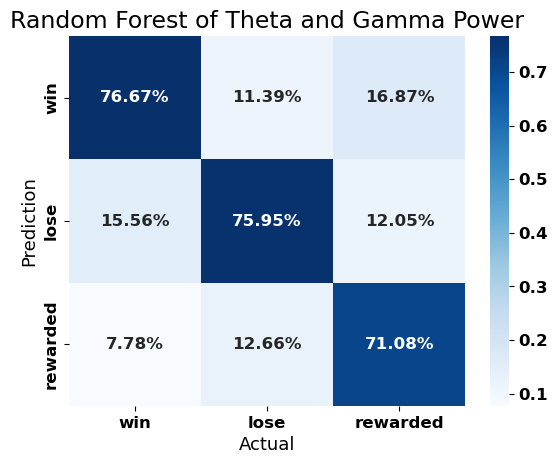

In [60]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [61]:
forest_importances = pd.concat(all_importances)

In [62]:
# forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
forest_importances = forest_importances.rename(columns={0: "mdi"})

In [63]:
mean_importances = forest_importances.groupby("index").mean().reset_index()
mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})

In [64]:
sem_importances = forest_importances.groupby("index").sem().reset_index()
sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})

In [65]:
forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")

In [66]:
sem_importances

,index,sem_mdi
0,BLA_LH_gamma_band_coherence,0.000668
1,BLA_LH_gamma_band_granger,0.001112
2,BLA_LH_theta_band_coherence,0.001227
3,BLA_LH_theta_band_granger,0.001571
4,BLA_MD_gamma_band_coherence,0.000831
...,...,...
65,vHPC_MD_theta_band_granger,0.001379
66,vHPC_gamma_band_power,0.001684
67,vHPC_mPFC_gamma_band_granger,0.001157
68,vHPC_mPFC_theta_band_granger,0.001181


In [67]:
forest_importances

,index,mean_mdi,sem_mdi
0,BLA_LH_gamma_band_coherence,0.009767,0.000668
1,BLA_LH_gamma_band_granger,0.017919,0.001112
2,BLA_LH_theta_band_coherence,0.015071,0.001227
3,BLA_LH_theta_band_granger,0.010940,0.001571
4,BLA_MD_gamma_band_coherence,0.011535,0.000831
...,...,...,...
65,vHPC_MD_theta_band_granger,0.014198,0.001379
66,vHPC_gamma_band_power,0.017454,0.001684
67,vHPC_mPFC_gamma_band_granger,0.014366,0.001157
68,vHPC_mPFC_theta_band_granger,0.011388,0.001181


In [68]:
# forest_importances = forest_importances.groupby("index").mean().reset_index()
forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)

In [69]:
forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])

In [70]:
forest_importances = forest_importances.iloc[:20]

In [71]:
forest_importances["band"]

0     gamma
1     theta
2     theta
3     theta
4     theta
5     theta
6     theta
7     gamma
8     theta
9     gamma
10    theta
11    theta
12    gamma
13    theta
14    theta
15    gamma
16    gamma
17    gamma
18    gamma
19    gamma
Name: band, dtype: object

In [72]:
forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)

In [73]:
forest_importances

,index,mean_mdi,sem_mdi,brain_regions,band,measure,color,pattern
0,MD_gamma_band_power,0.032402,0.000769,MD,gamma,power,#15616F,
1,LH_theta_band_power,0.029735,0.003337,LH,theta,power,#FFAF00,
2,BLA_theta_band_power,0.028063,0.001630,BLA,theta,power,#FFAF00,
3,LH_vHPC_theta_band_coherence,0.025955,0.001613,LH_vHPC,theta,coherence,#FFAF00,x
4,vHPC_theta_band_power,0.025820,0.001362,vHPC,theta,power,#FFAF00,
5,vHPC_LH_theta_band_granger,0.025619,0.002563,vHPC_LH,theta,granger,#FFAF00,o
6,vHPC_BLA_theta_band_granger,0.024928,0.001183,vHPC_BLA,theta,granger,#FFAF00,o
7,LH_MD_gamma_band_coherence,0.023323,0.001748,LH_MD,gamma,coherence,#15616F,x
8,MD_vHPC_theta_band_coherence,0.022966,0.001859,MD_vHPC,theta,coherence,#FFAF00,x
9,LH_vHPC_gamma_band_coherence,0.022871,0.004104,LH_vHPC,gamma,coherence,#15616F,x


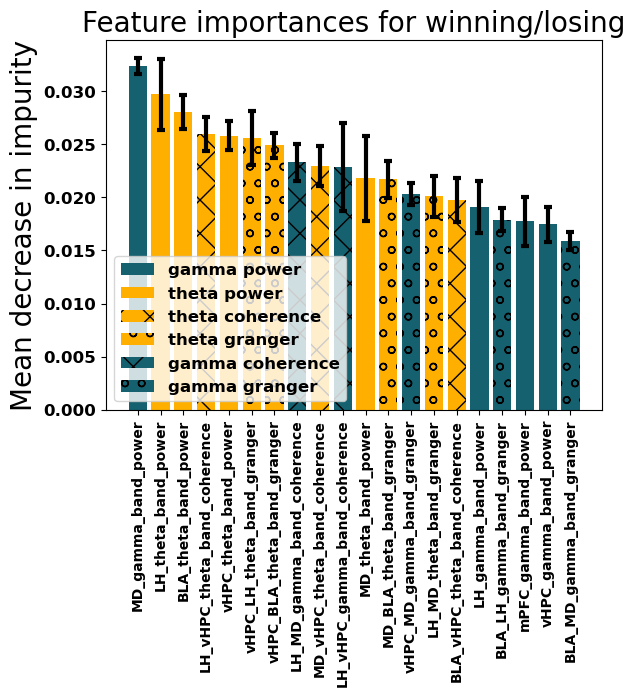

In [74]:
for index, row in forest_importances.iterrows():
    plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])

plt.xticks(fontsize=10, rotation=90)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
    yerr=forest_importances["sem_mdi"],
    color='k',
    capsize=3,
    linestyle='None',
    elinewidth=3,
    capthick=3)

plt.title("Feature importances for winning/losing", fontsize=20)
plt.ylabel("Mean decrease in impurity", fontsize=20)
# plt.tight_layout()
# plt.legend(ncol=3)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./proc/network/rf_power_feature_importance.png")
plt.show()

- Shuffling the labels

In [75]:
shuffled_scores=[]

kFold=KFold(n_splits=5,shuffle=True, random_state=1)

all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array):
    
    X_train = network_array[train_index]  
    X_test = network_array[test_index]
    y_train = shuffle(network_df[GROUPING].values[train_index])
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    shuffled_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(shuffled_scores)
# 0.9393939393939394

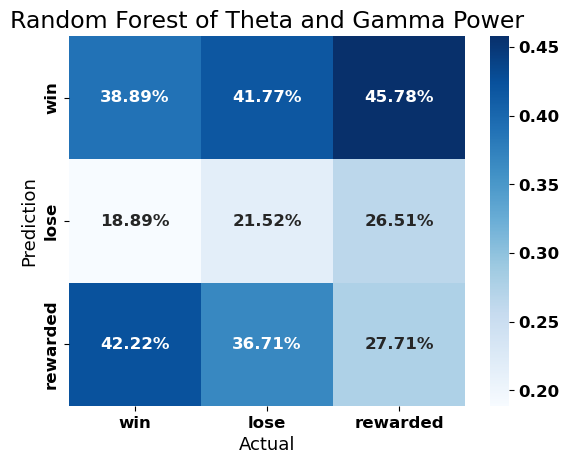

In [76]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Theta and Gamma Power',fontsize=17)
# plt.savefig("./proc/rf_original_power_confusion_matrix.png")
plt.show()

In [77]:
shuffled_scores

[0.35294117647058826, 0.37254901960784315, 0.3, 0.18, 0.28]

In [78]:
original_scores

[0.7058823529411765, 0.8235294117647058, 0.66, 0.76, 0.78]

In [79]:
np.std(shuffled_scores)

0.0675633355159153

In [80]:
np.std(original_scores)

0.057215672835273707

In [81]:
from scipy import stats


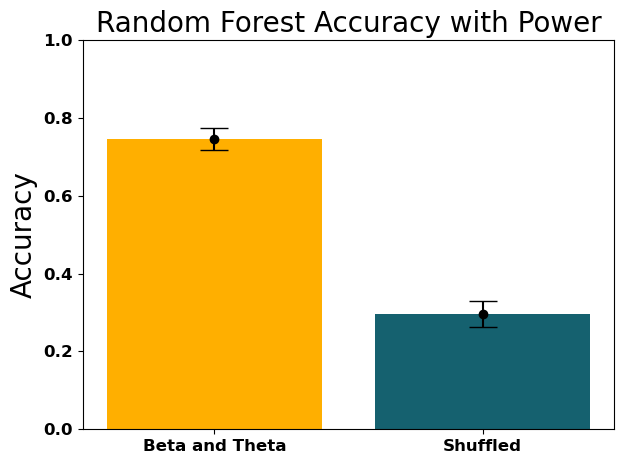

In [82]:
plt.bar(x=["Beta and Theta", "Shuffled"], height=[np.mean(original_scores), np.mean(shuffled_scores)], color= ["#FFAF00", "#15616F"])
plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Accuracy with Power", fontsize=20)
plt.errorbar(["Beta and Theta", "Shuffled"], [np.mean(original_scores), np.mean(shuffled_scores)], yerr=[stats.sem(original_scores), stats.sem(shuffled_scores)], fmt="o", color="black", capsize=10)
plt.ylim(0,1)
plt.tight_layout()
# plt.savefig("./proc/rf_power_predictions_score.png")

# Running random forest with different combinations

In [83]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [84]:
sub_features = ["power", "coherence", "granger", "theta", "gamma"]

In [85]:
# [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "trace" in col]
brain_regions = [col.split("_")[0] for col in MERGED_LFP_AND_SLEAP if "baseline-trial_lfp_trace" in col]

In [86]:
sub_feature_to_columns = {}

In [87]:
sub_feature_to_columns["All features"] = [col for col in feature_columns if "band" in col]

In [88]:
for feature in sub_features:
    sub_feature_to_columns["{} only".format(feature.capitalize())] = [col for col in feature_columns if feature in col] 

In [89]:
for region in brain_regions:
    sub_feature_to_columns["{} removed".format(region)] = [col for col in feature_columns if region not in col]

In [90]:
sub_feature_to_columns

{'All features': ['mPFC_theta_band_power',
  'mPFC_gamma_band_power',
  'vHPC_theta_band_power',
  'vHPC_gamma_band_power',
  'BLA_theta_band_power',
  'BLA_gamma_band_power',
  'LH_theta_band_power',
  'LH_gamma_band_power',
  'MD_theta_band_power',
  'MD_gamma_band_power',
  'BLA_LH_theta_band_coherence',
  'BLA_LH_gamma_band_coherence',
  'BLA_MD_theta_band_coherence',
  'BLA_MD_gamma_band_coherence',
  'BLA_mPFC_theta_band_coherence',
  'BLA_mPFC_gamma_band_coherence',
  'BLA_vHPC_theta_band_coherence',
  'BLA_vHPC_gamma_band_coherence',
  'LH_MD_theta_band_coherence',
  'LH_MD_gamma_band_coherence',
  'LH_mPFC_theta_band_coherence',
  'LH_mPFC_gamma_band_coherence',
  'LH_vHPC_theta_band_coherence',
  'LH_vHPC_gamma_band_coherence',
  'MD_mPFC_theta_band_coherence',
  'MD_mPFC_gamma_band_coherence',
  'MD_vHPC_theta_band_coherence',
  'MD_vHPC_gamma_band_coherence',
  'mPFC_vHPC_theta_band_coherence',
  'mPFC_vHPC_gamma_band_coherence',
  'BLA_LH_theta_band_granger',
  'BLA_LH_gam

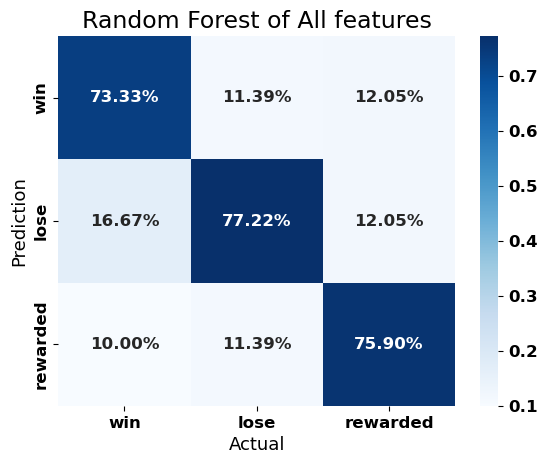

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


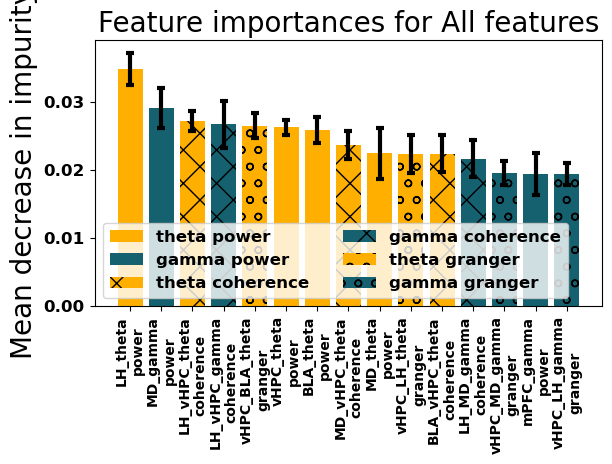

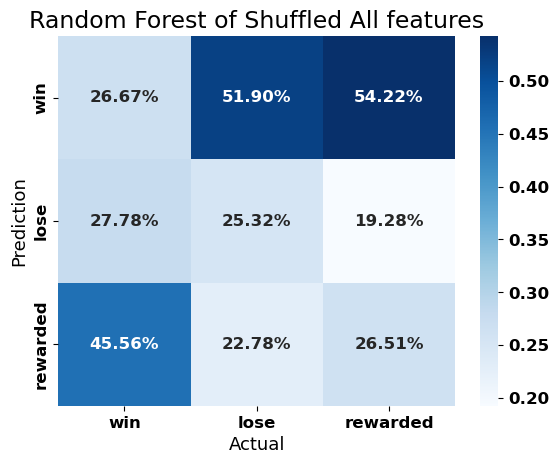

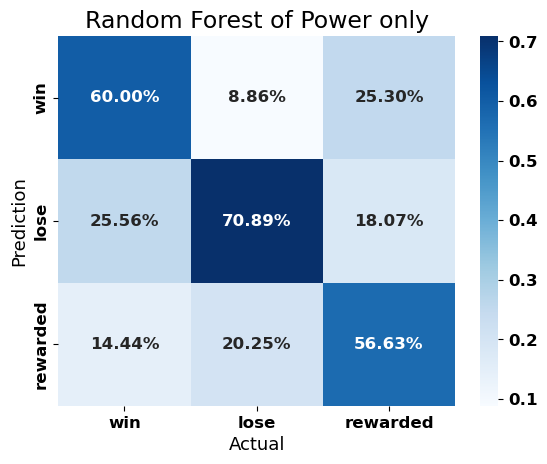

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


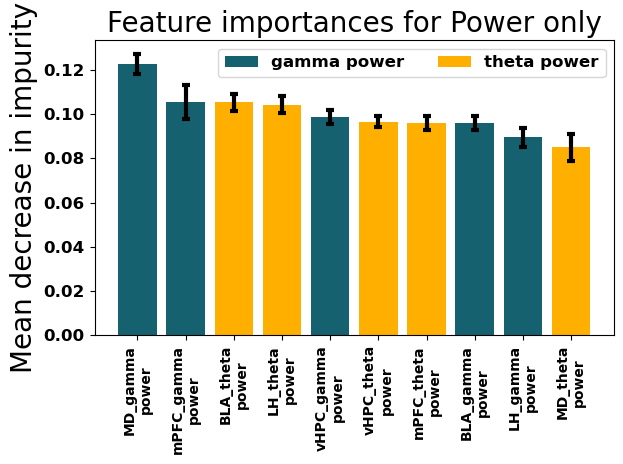

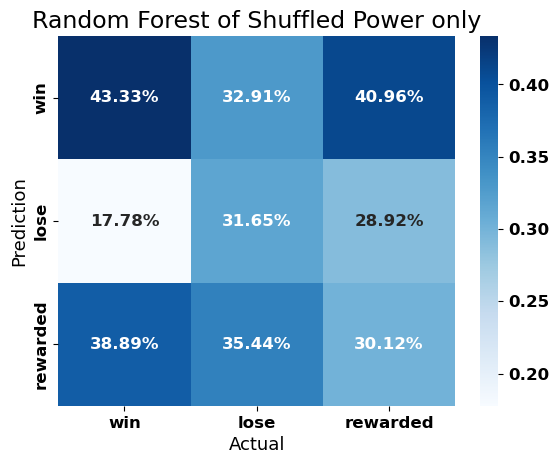

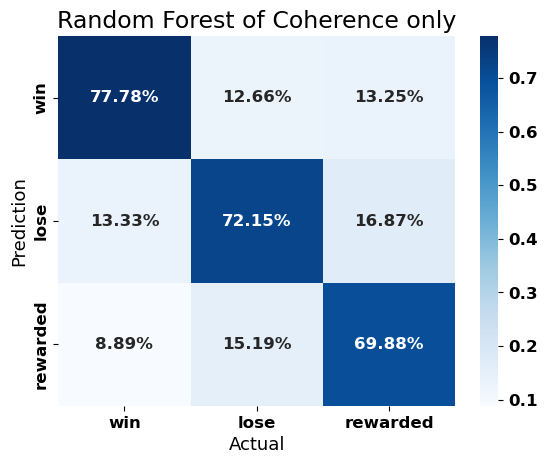

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


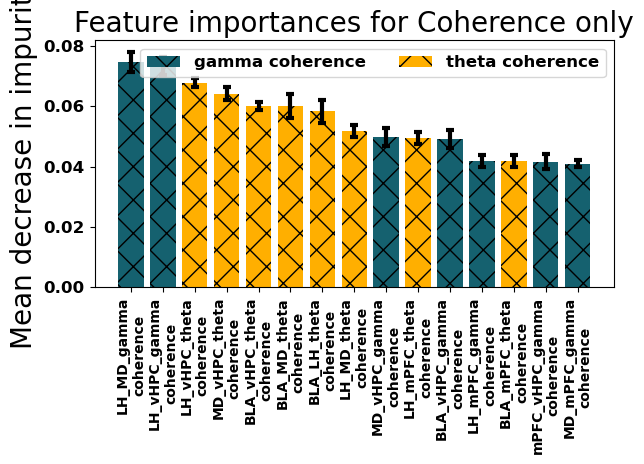

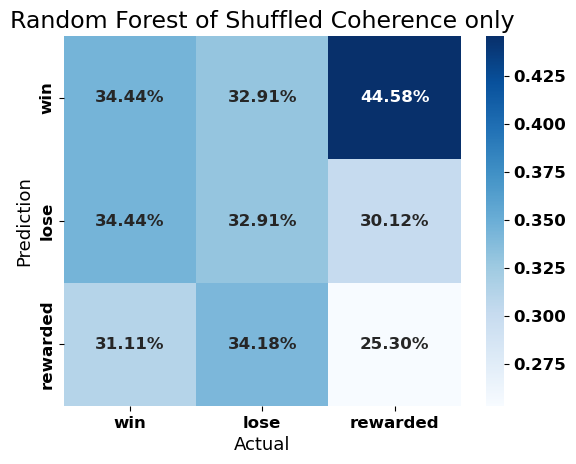

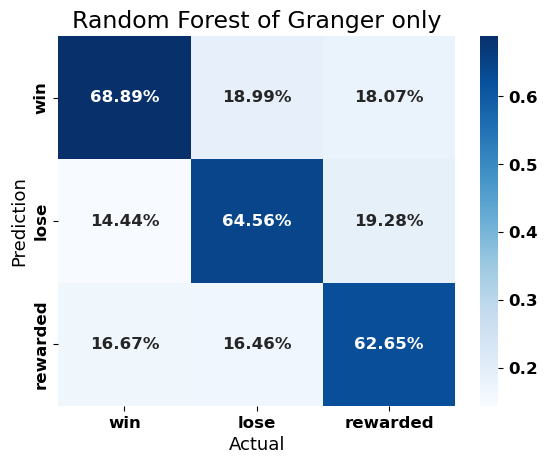

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


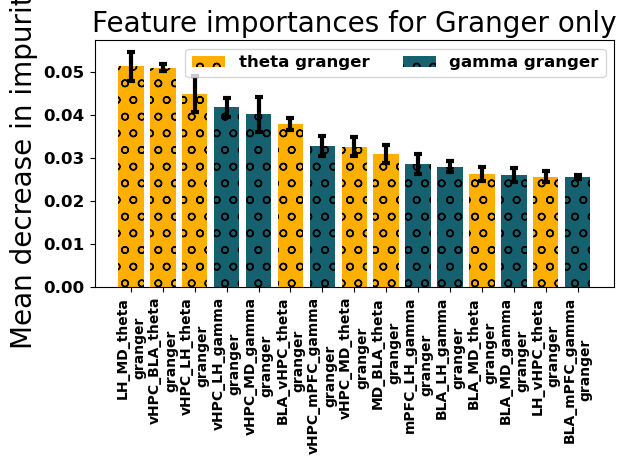

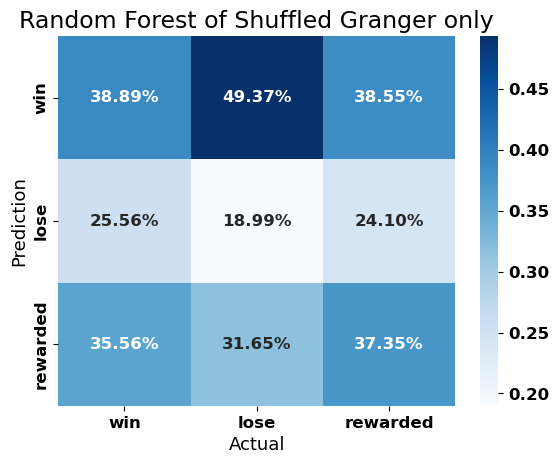

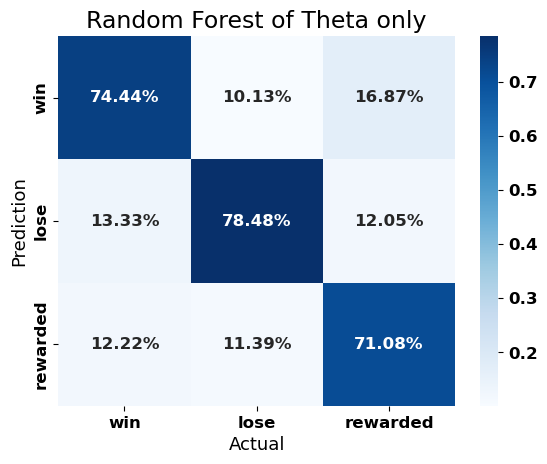

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


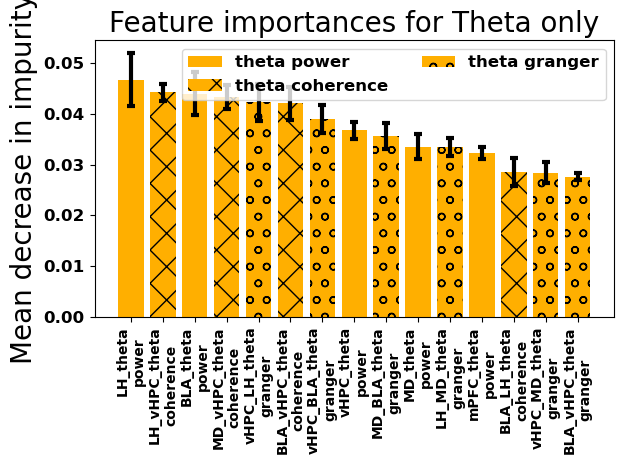

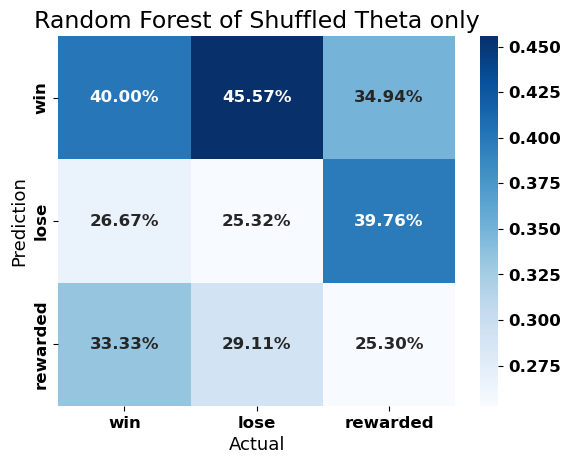

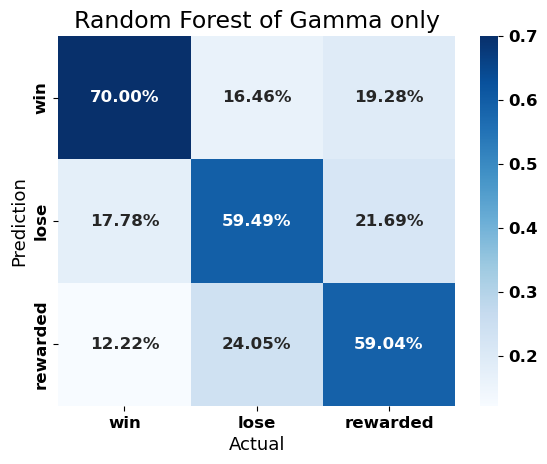

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


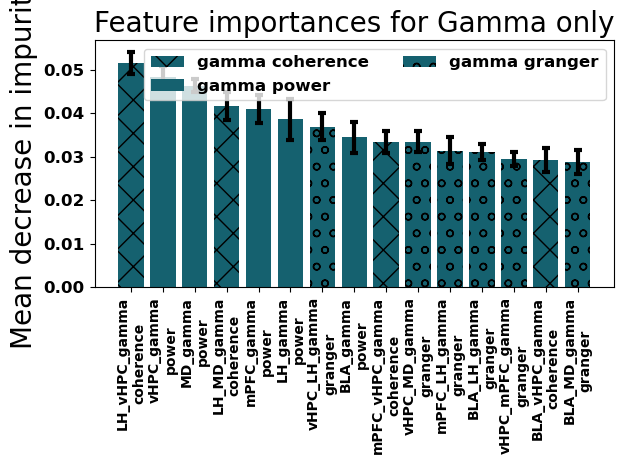

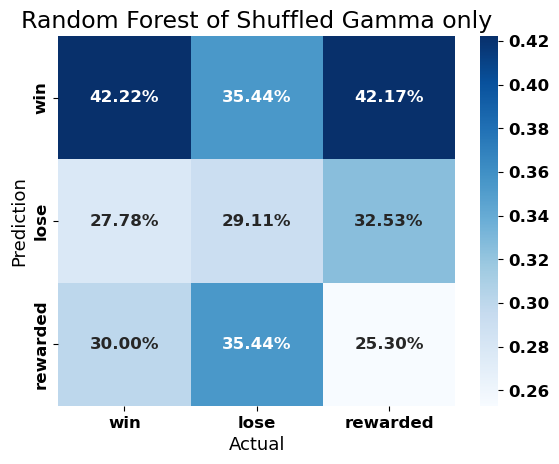

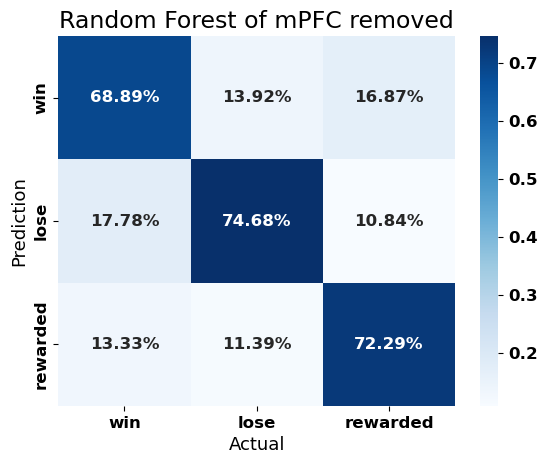

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


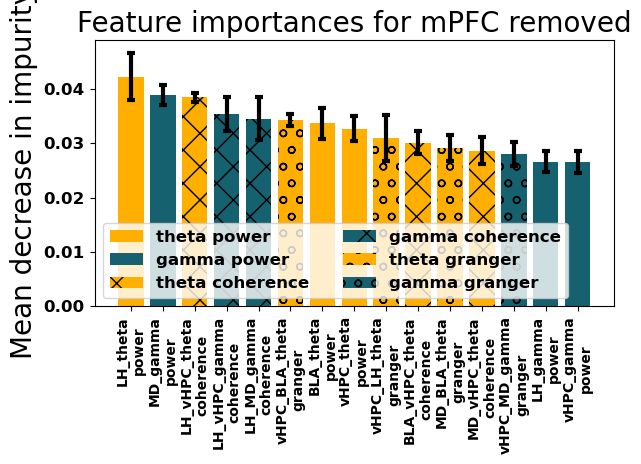

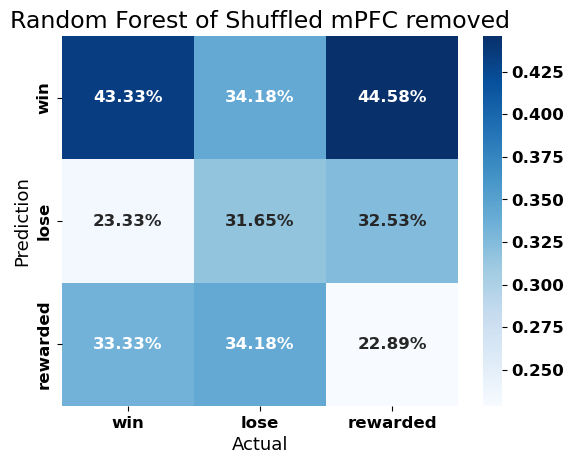

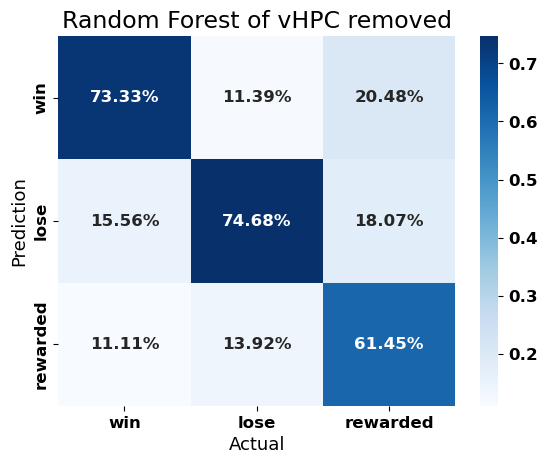

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


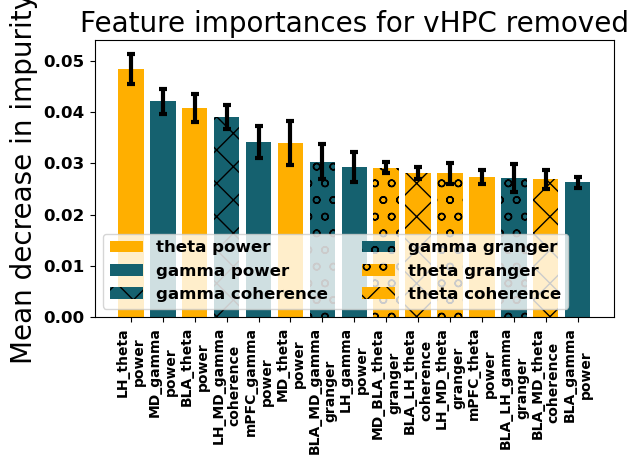

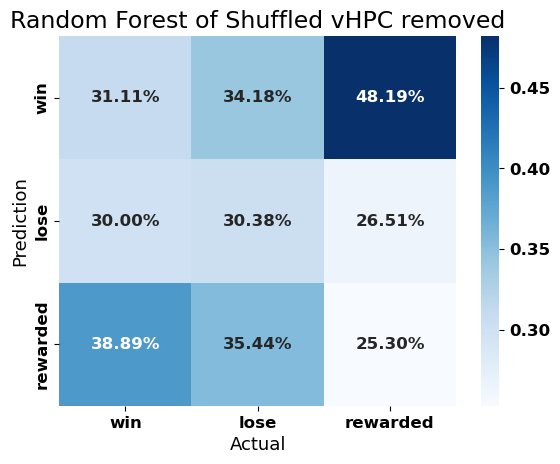

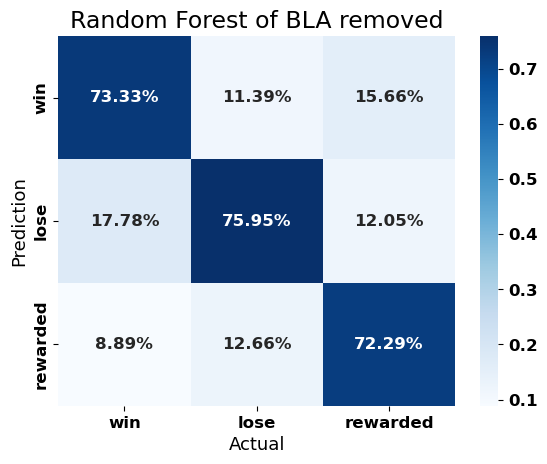

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


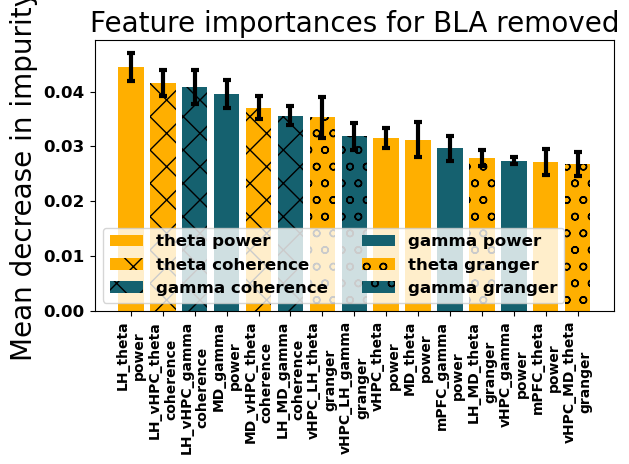

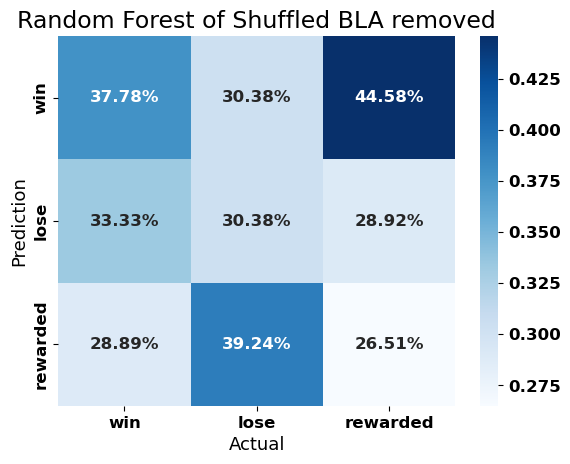

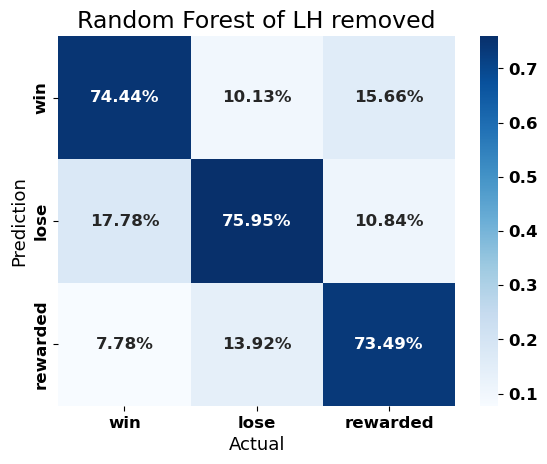

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


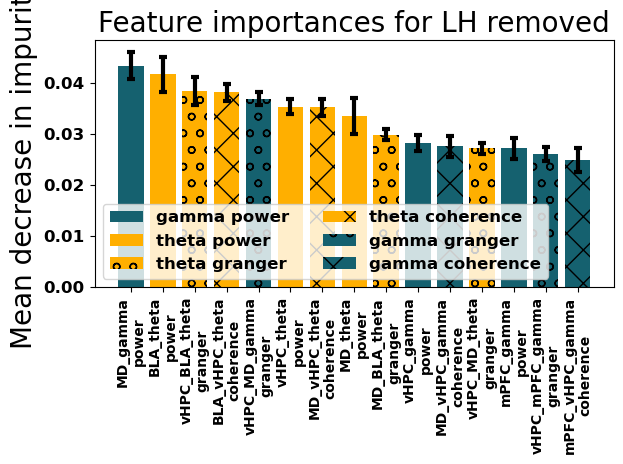

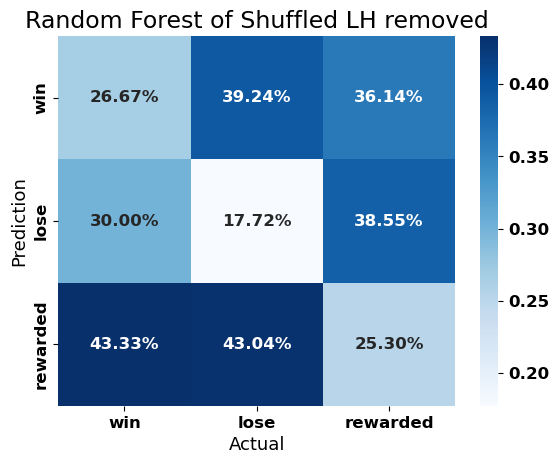

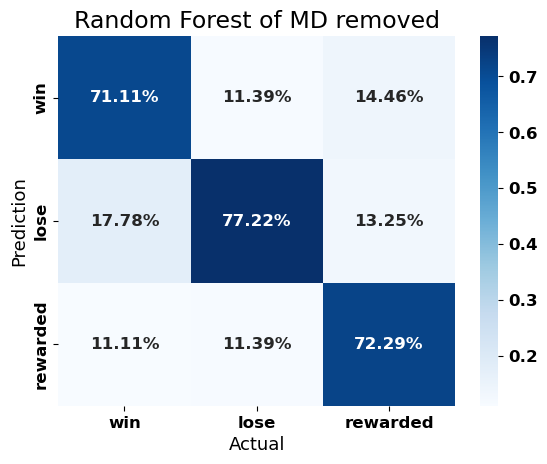

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


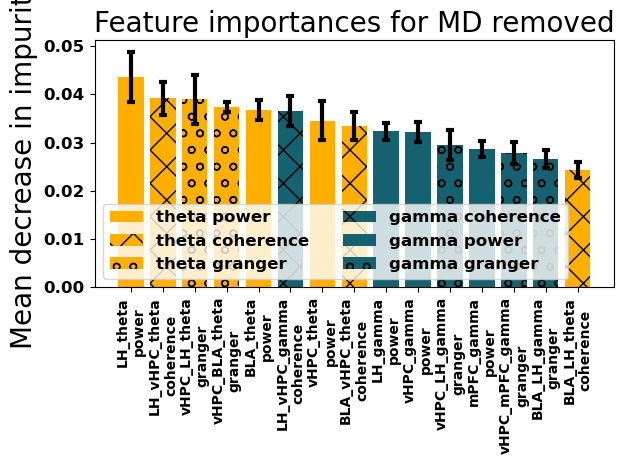

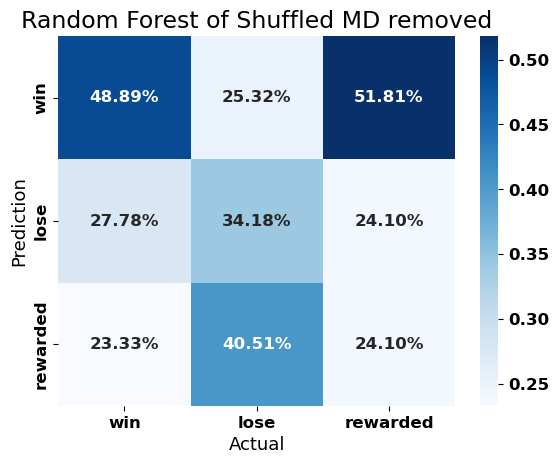

In [91]:
feature_to_scores = {}
for feature, all_columns in sub_feature_to_columns.items():
    network_array = network_df[all_columns].values

    original_scores=[]
    # kFold=KFold(n_splits=5,shuffle=True)
    kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = network_df[GROUPING].values[train_index]
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        original_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
        importances = clf.feature_importances_
        all_importances.append(pd.DataFrame(importances, index=all_columns).sort_values(0, ascending=False).reset_index())
    
    mean_original_scores = np.mean(original_scores)
    
    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of {}'.format(feature),fontsize=17)
    plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
    plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

    plt.show()   
    
    fig, ax = plt.subplots()
    forest_importances = pd.concat(all_importances)
    # forest_importances = pd.DataFrame(importances, index=feature_columns).sort_values(0, ascending=False).reset_index()
    forest_importances = forest_importances.rename(columns={0: "mdi"})
    mean_importances = forest_importances.groupby("index").mean().reset_index()
    mean_importances = mean_importances.rename(columns={"mdi": "mean_mdi"})
    sem_importances = forest_importances.groupby("index").sem().reset_index()
    sem_importances = sem_importances.rename(columns={"mdi": "sem_mdi"})
    forest_importances = pd.merge(left=mean_importances, left_on="index", right=sem_importances, right_on="index")
    
    # forest_importances = forest_importances.groupby("index").mean().reset_index()
    forest_importances = forest_importances.sort_values("mean_mdi", ascending=False).reset_index(drop=True)
    forest_importances["brain_regions"] = forest_importances["index"].apply(lambda x: "_".join(x.split("band")[0].split("_")[:-2]))
    forest_importances["band"] = forest_importances["index"].apply(lambda x: x.split("band")[0].strip("_").split("_")[-1])
    forest_importances["measure"] = forest_importances["index"].apply(lambda x:x.split("_")[-1])
    forest_importances["index"] = forest_importances["index"].apply(lambda x: x.replace("_band_", "\n"))
    # forest_importances["index"] = forest_importances["index"].apply(lambda x: "_".join(x.split("_")[:-]))

    
    forest_importances = forest_importances.iloc[:15]
    forest_importances["color"] = forest_importances["band"].map(BAND_TO_COLOR)
    forest_importances["pattern"] = forest_importances["measure"].map(MEASURE_TO_PATTERN)
    
    for index, row in forest_importances.iterrows():
        plt.bar(row["index"], row["mean_mdi"], color=row["color"], label="{} {}".format(row["band"], row["measure"]), hatch=row["pattern"])
    
    plt.xticks(fontsize=10, rotation=90)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    
    plt.errorbar(forest_importances.index, forest_importances["mean_mdi"],
        yerr=forest_importances["sem_mdi"],
        color='k',
        capsize=3,
        linestyle='None',
        elinewidth=3,
        capthick=3)
    
    plt.title("Feature importances for {}".format(feature), fontsize=20)
    plt.ylabel("Mean decrease in impurity", fontsize=20)
    plt.tight_layout()
    # plt.legend(ncol=3)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)
    plt.savefig("./proc/network/rf_{}_feature_importance.png".format(feature))
    plt.savefig("./proc/network/rf_{}_feature_importance.eps".format(feature))

    plt.show()

    ##### SHUFFLING DATA ###############    
    shuffled_scores=[]
    
    kFold=KFold(n_splits=5,shuffle=True, random_state=1)
    
    all_y_test = []
    all_predictions = []
    all_importances = []
    
    # creating a RF classifier 
    clf = RandomForestClassifier(n_estimators = 100)   
    for train_index, test_index in kFold.split(network_array):
        
        X_train = network_array[train_index]  
        X_test = network_array[test_index]
        y_train = shuffle(network_df[GROUPING].values[train_index])
        y_test = network_df[GROUPING].values[test_index]
    
        # Training the model on the training dataset 
        # fit function is used to train the model using the training sets as parameters 
        clf.fit(X_train, y_train) 
        shuffled_scores.append(clf.score(X_test,y_test))
    
        all_y_test += y_test.tolist()
        all_predictions += clf.predict(X_test).tolist()
    
    mean_original_scores = np.mean(shuffled_scores)

    #compute the confusion matrix.
    cm = confusion_matrix(all_predictions,all_y_test, labels=OUTCOME_LABELS)
    
    #Plot the confusion matrix.
    sns.heatmap(cm/sum(cm), 
                annot=True,
                # fmt='g', 
                fmt='.2%',
               cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
    # sns.light_palette("seagreen", as_cmap=True)
    
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Random Forest of Shuffled {}'.format(feature),fontsize=17)
    plt.savefig("./proc/rf_{}shuffled_power_confusion_matrix.png".format(feature))
    plt.show()
    feature_to_scores[feature] = (original_scores, shuffled_scores)



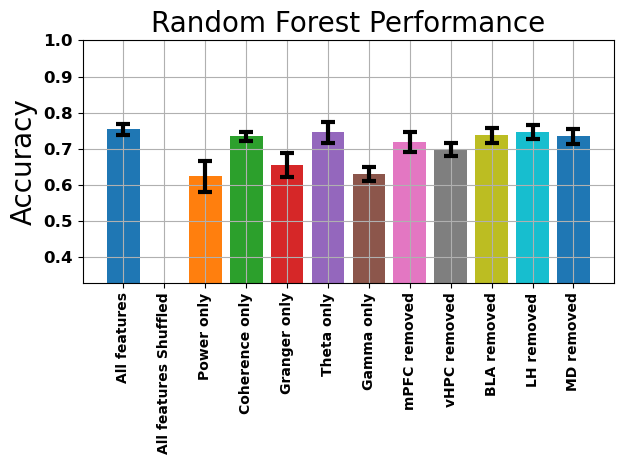

In [92]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():
    if "All features" == feat:
        plt.bar(x=["{}".format(feat), "{} Shuffled".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat), "{} Shuffled".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
                elinewidth=3,
                capthick=3)
    else:
        plt.bar(x=["{}".format(feat)], height=[np.mean(original_score)])#, color= ["#FFAF00", "#15616F"])
        plt.errorbar(["{}".format(feat)], [np.mean(original_score)], yerr=[stats.sem(original_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)

plt.ylabel("Accuracy", fontsize=20)
plt.title("Random Forest Performance", fontsize=20)
plt.ylim(0.33,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

plt.savefig("./proc/network/rf_all_feature_accuracy.png")
plt.savefig("./proc/network/rf_all_feature_accuracy.eps")


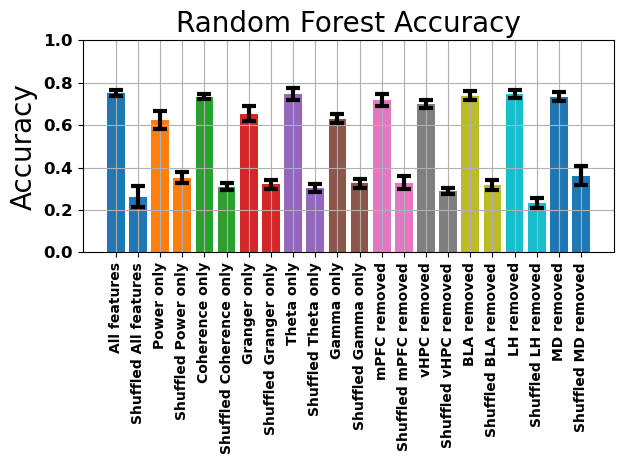

In [93]:
fig, ax = plt.subplots()
for feat, (original_score, shuffled_score) in feature_to_scores.items():

    plt.bar(x=["{}".format(feat), "Shuffled {}".format(feat)], height=[np.mean(original_score), np.mean(shuffled_score)])#, color= ["#FFAF00", "#15616F"])
    plt.ylabel("Accuracy", fontsize=20)
    plt.title("Random Forest Accuracy", fontsize=20)
    plt.errorbar(["{}".format(feat), "Shuffled {}".format(feat)], [np.mean(original_score), np.mean(shuffled_score)], yerr=[stats.sem(original_score), stats.sem(shuffled_score)], color="black", capsize=5, linestyle='None',
        elinewidth=3,
        capthick=3)
plt.ylim(0,1)
plt.xticks(fontsize=10, rotation=90)
plt.grid()
plt.tight_layout()

# plt.savefig("./proc/network/rf_all_accuracy.png")
# plt.savefig("./proc/network/rf_all_accuracy.eps")


# Comparing for significance

In [94]:
from itertools import product

In [95]:
feature_pairs = generate_pairs(list(feature_to_scores.keys()))

In [96]:
feature_pair_to_significance = []
for feature_1, feature_2 in feature_pairs:
    if "All features" in (feature_1, feature_2):
        ttest_stats, ttest_pvalue = stats.ttest_rel(feature_to_scores[feature_1][0], feature_to_scores[feature_2][0])
        feature_pair_to_significance.append({"feature_pair":sorted([feature_1, feature_2]), "ttest_stats": ttest_stats, "p_value": ttest_pvalue})
    

In [97]:
feature_pair_to_significance = pd.DataFrame(feature_pair_to_significance)

In [98]:
feature_pair_to_significance["significance"] = feature_pair_to_significance["p_value"].apply(lambda x: get_significance_stars_from_p_value(x, number_of_comparisons=1))

In [99]:
feature_pair_to_significance = feature_pair_to_significance.sort_values("p_value").reset_index(drop=True)

In [100]:
feature_pair_to_significance

,feature_pair,ttest_stats,p_value,significance
0,"[All features, Gamma only]",5.703852,0.004670,***
1,"[All features, Power only]",3.024274,0.038999,*
2,"[All features, Granger only]",2.754024,0.051162,
3,"[All features, vHPC removed]",2.256057,0.087059,
4,"[All features, mPFC removed]",1.767167,0.151941,
5,"[All features, MD removed]",1.296141,0.264653,
6,"[All features, BLA removed]",0.925658,0.407015,
7,"[All features, Coherence only]",0.778858,0.479568,
8,"[All features, LH removed]",0.304154,0.776177,
9,"[All features, Theta only]",0.269162,0.801119,


In [101]:
feature_pair_to_significance.to_csv("./proc/network/rf_feature_ttest.csv")

# Reducing Dimensions

In [ ]:
network_df = MERGED_LFP_AND_SLEAP.copy()

In [ ]:
MERGED_LFP_AND_SLEAP

In [ ]:
OUTCOME_TO_COLOR

In [ ]:
network_df["trial_outcome"].unique()

In [ ]:
network_df["competition_closeness"]

In [ ]:
GROUPING = "trial_outcome"

In [ ]:
feature_columns = [col for col in MERGED_LFP_AND_SLEAP if "band" in col and "beta" not in col]

In [ ]:
feature_columns

In [ ]:
network_df = network_df.reset_index(drop=True)

In [ ]:
network_array = network_df[feature_columns].values

In [ ]:
GROUPING = "competition_closeness"
GROUPING = "trial_outcome"


In [ ]:
scaler = StandardScaler()
lda = LinearDiscriminantAnalysis()

In [ ]:
reduced_dimension_network_array = scaler.fit_transform(network_array)
reduced_dimension_network_array = lda.fit_transform(reduced_dimension_network_array, network_df[GROUPING])

In [ ]:
reduced_dimension_network_array.shape

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_outcome_labeled.png")
plt.savefig("./proc/network/rf_LDA_outcome_labeled.eps")
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(reduced_dimension_network_array[current_df.index,0], reduced_dimension_network_array[current_df.index,1], label=group)

    
plt.title("LDA of LFP features", fontsize=20)
plt.xlabel("LD1", fontsize=20)
plt.ylabel("LD2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_LDA_subject_labeled.png")
plt.savefig("./proc/network/rf_LDA_subject_labeled.eps")
plt.show()

In [ ]:
# Get the coefficients (loadings) of each feature
loadings = lda.scalings_

# Calculate importance for each feature for each discriminant
# The importance is calculated as the square of each coefficient
importance = np.square(loadings)



In [ ]:
lda_importance = pd.DataFrame(importance)
lda_importance["feature"] = feature_columns

In [ ]:
important_features = []

In [ ]:
lda_importance.sort_values(0, ascending=False)

In [ ]:
important_features += lda_importance.sort_values(0, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
important_features += lda_importance.sort_values(1, ascending=False).head(n=4)["feature"].to_list()

In [ ]:
filtered_lda_importance = lda_importance[lda_importance["feature"].isin(important_features)]

In [ ]:
filtered_lda_importance = filtered_lda_importance.sort_values(0, ascending=False)

In [ ]:
filtered_lda_importance["feature"] = filtered_lda_importance["feature"].apply(lambda x: x.replace("_band_", "\n").replace("_", " "))

In [ ]:
# Sample data
list1 = filtered_lda_importance[0]
list2 = filtered_lda_importance[1]
indices = range(len(list1))

# Creating the plot
fig, ax1 = plt.subplots()

# Plotting the first list
color1 = '#15616F'
# FFAF00; teal #15616F
ax1.bar(indices, list1, width=0.4, align='center', color=color1)
# ax1.set_xlabel('Index')
ax1.set_ylabel('LD1 Scalings', color=color1, fontsize=20)
ax1.tick_params(axis='y', labelcolor=color1, rotation=90)

# Creating a second Y-axis for the second list
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.bar([i + 0.4 for i in indices], list2, width=0.4, align='center', color=color2)
ax2.set_ylabel('LD2 Scalings', color=color2, fontsize=20)
ax2.tick_params(axis='y', labelcolor=color2, rotation=90)

# Adjusting the X-axis to show labels correctly
ax1.set_xticks(indices, filtered_lda_importance['feature'].values, rotation = 90, fontsize=15)
# xticks(indices, filtered_lda_importance['feature'].values, rotation = 90)
# plt.xticks(labels=filtered_lda_importance['feature'])

plt.title('LDA feature importance', fontsize=20)
plt.savefig("./proc/network/lda_feature_importance.png")
plt.savefig("./proc/network/lda_feature_importance.eps")

plt.show()

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance['feature'].values

In [ ]:
filtered_lda_importance[0]

In [ ]:
importance.shape

In [ ]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(network_array)
network_df = network_df.reset_index(drop=True)

In [ ]:
plt.figure(figsize=(5,5))
for group in network_df[GROUPING].unique():
    current_df = network_df[network_df[GROUPING] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], c=OUTCOME_TO_COLOR[group], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_outcome_labeled.png")
plt.savefig("./proc/network/rf_PCA_outcome_labeled.eps")
plt.show()

In [ ]:

plt.figure(figsize=(5,5))

for group in network_df["current_subject"].unique():
    current_df = network_df[network_df["current_subject"] == group]
    
    plot = plt.scatter(Xt[current_df.index,0], Xt[current_df.index,1], label=group)

    
plt.title("PCA of LFP features", fontsize=20)
plt.xlabel("PC1", fontsize=20)
plt.ylabel("PC2", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("./proc/network/rf_PCA_subject_labeled.png")
plt.savefig("./proc/network/rf_PCA_subject_labeled.eps")
plt.show()

# Using PCA

In [ ]:
network_array = network_df[feature_columns].values

original_scores=[]
# kFold=KFold(n_splits=5,shuffle=True)
kFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)


all_y_test = []
all_predictions = []
all_importances = []

# creating a RF classifier 
clf = RandomForestClassifier(n_estimators = 100)   
for train_index, test_index in kFold.split(network_array, network_df[GROUPING]):
    scaler = StandardScaler()   
    # dim_reducer = FastICA(n_components=5)
    dim_reducer = LinearDiscriminantAnalysis(solver="eigen")
    # dim_reducer = PCA(n_components=20)
    scaler.fit(network_array[train_index])
    # scaler.fit(network_array[train_index])
    X_train = scaler.transform(network_array[train_index]) 
    dim_reducer.fit(X_train, network_df[GROUPING].values[train_index])
    X_train = dim_reducer.transform(X_train)
 
    X_test = dim_reducer.transform(scaler.transform(network_array[test_index]))
    y_train = network_df[GROUPING].values[train_index]
    y_test = network_df[GROUPING].values[test_index]

    # Training the model on the training dataset 
    # fit function is used to train the model using the training sets as parameters 
    clf.fit(X_train, y_train) 
    original_scores.append(clf.score(X_test,y_test))

    all_y_test += y_test.tolist()
    all_predictions += clf.predict(X_test).tolist()
    importances = clf.feature_importances_
    all_importances.append(pd.DataFrame(importances).sort_values(0, ascending=False).reset_index())

mean_original_scores = np.mean(original_scores)


In [ ]:
mean_original_scores

In [ ]:
#compute the confusion matrix.
cm = confusion_matrix(all_predictions, all_y_test, labels=OUTCOME_LABELS)

#Plot the confusion matrix.
sns.heatmap(cm/sum(cm), 
            annot=True,
            # fmt='g', 
            fmt='.2%',
           cmap="Blues", xticklabels=OUTCOME_LABELS, yticklabels=OUTCOME_LABELS)
# sns.light_palette("seagreen", as_cmap=True)

plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest of Dimensionality Reduction'.format(),fontsize=17)
# plt.savefig("./proc/network/rf_{}_confusion_matrix.png".format(feature))
# plt.savefig("./proc/network/rf_{}_confusion_matrix.eps".format(feature))

plt.show()   

In [ ]:
raise ValueError()